# EEG-Alcoholic data
###### Author: Mokhtar Z. Alaya <alayaelm@utc.fr>
###### Ref: https://www.kaggle.com/code/ruslankl/eeg-data-analysis

In [9]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu


init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"
os.chdir(path_data)

In [10]:
data = path_data + '/EEG-Alcohol/SMNI_CMI_TRAIN/'

import glob
appended_data = []
for filename in sorted(glob.glob(data + "*.csv")):
    data = pd.read_csv(filename )
    appended_data.append(data)


In [30]:
EEG_data = pd.concat(appended_data)
# write DataFrame to an excel sheet 
# EEG_data.to_csv('EEG_data.csv')

In [31]:
EEG_data.shape

(7667712, 10)

In [32]:
EEG_data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [33]:
np.unique(EEG_data['trial number'].values)

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  41,
        43,  45,  47,  49,  51,  53,  55,  57,  59,  61,  63,  65,  67,
        71,  73,  75,  77,  79,  83,  87,  89,  97, 107])

In [34]:
np.unique(EEG_data['sensor position'].values)

array(['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3',
       'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8',
       'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7',
       'TP8', 'X', 'Y', 'nd'], dtype=object)

In [35]:
EEG_data_FP1 = EEG_data[EEG_data['sensor position'] == 'FP1']
EEG_data_FP2 = EEG_data[EEG_data['sensor position'] == 'FP2']
EEG_data_AF1 = EEG_data[EEG_data['sensor position'] == 'AF1']

In [36]:
EEG_data_FP1.shape

(119808, 10)

In [37]:
EEG_data_FP1.columns

Index(['Unnamed: 0', 'trial number', 'sensor position', 'sample num',
       'sensor value', 'subject identifier', 'matching condition', 'channel',
       'name', 'time'],
      dtype='object')

In [38]:
np.unique(EEG_data_FP1['time'])

array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
       0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
       0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
       0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
       0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
       0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
       0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
       0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
       0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
       0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
       0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
       0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
       0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
       0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
       0.2734375 , 0.27734375, 0.28125   , 0.28515625, 0.28906

In [39]:
EEG_data_FP1['time'][256: 300]

0     0.000000
1     0.003906
2     0.007812
3     0.011719
4     0.015625
5     0.019531
6     0.023438
7     0.027344
8     0.031250
9     0.035156
10    0.039062
11    0.042969
12    0.046875
13    0.050781
14    0.054688
15    0.058594
16    0.062500
17    0.066406
18    0.070312
19    0.074219
20    0.078125
21    0.082031
22    0.085938
23    0.089844
24    0.093750
25    0.097656
26    0.101562
27    0.105469
28    0.109375
29    0.113281
30    0.117188
31    0.121094
32    0.125000
33    0.128906
34    0.132812
35    0.136719
36    0.140625
37    0.144531
38    0.148438
39    0.152344
40    0.156250
41    0.160156
42    0.164062
43    0.167969
Name: time, dtype: float64

In [40]:
np.unique(EEG_data_FP1['trial number'])

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  41,
        43,  45,  47,  49,  51,  53,  55,  57,  59,  61,  63,  65,  67,
        71,  73,  75,  77,  79,  83,  87,  89,  97, 107])

In [41]:
EEG_data_FP1_trial_0 = EEG_data_FP1[EEG_data_FP1['trial number'] == 0]
EEG_data_FP1_trial_1 = EEG_data_FP1[EEG_data_FP1['trial number'] == 1]
EEG_data_FP1_trial_2 = EEG_data_FP1[EEG_data_FP1['trial number'] == 2]
EEG_data_FP1_trial_3 = EEG_data_FP1[EEG_data_FP1['trial number'] == 3]
EEG_data_FP1_trial_4 = EEG_data_FP1[EEG_data_FP1['trial number'] == 4]
EEG_data_FP1_trial_5 = EEG_data_FP1[EEG_data_FP1['trial number'] == 5]
EEG_data_FP1_trial_6 = EEG_data_FP1[EEG_data_FP1['trial number'] == 6]
EEG_data_FP1_trial_7 = EEG_data_FP1[EEG_data_FP1['trial number'] == 7]
EEG_data_FP1_trial_8 = EEG_data_FP1[EEG_data_FP1['trial number'] == 8]
EEG_data_FP1_trial_9 = EEG_data_FP1[EEG_data_FP1['trial number'] == 9]



In [42]:
EEG_data_FP1_trial_0.shape

(3584, 10)

In [43]:
time = EEG_data_FP1['time'][:255]

In [44]:
len(EEG_data_AF1['sensor value'])

119808

In [45]:
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

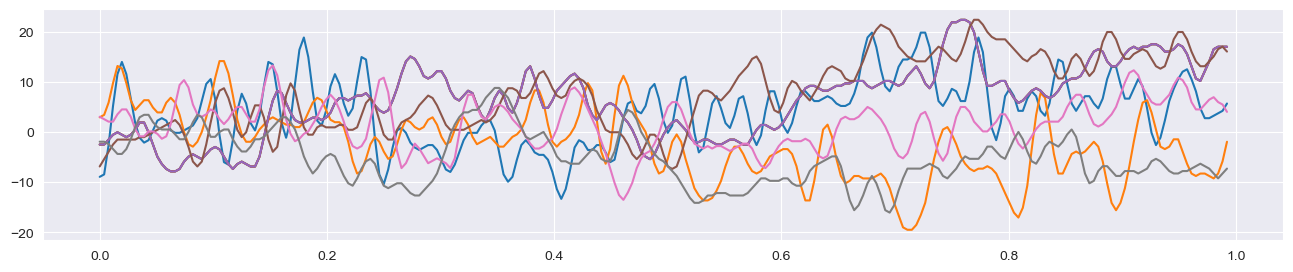

In [46]:
plt.rcParams["figure.figsize"] = (16,3)
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][:255])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][256:511])
# plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][512:767])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][768:1023])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][768:1023])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][768:1023])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][1024:1279])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][1280:1535])
plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][1536:1791])

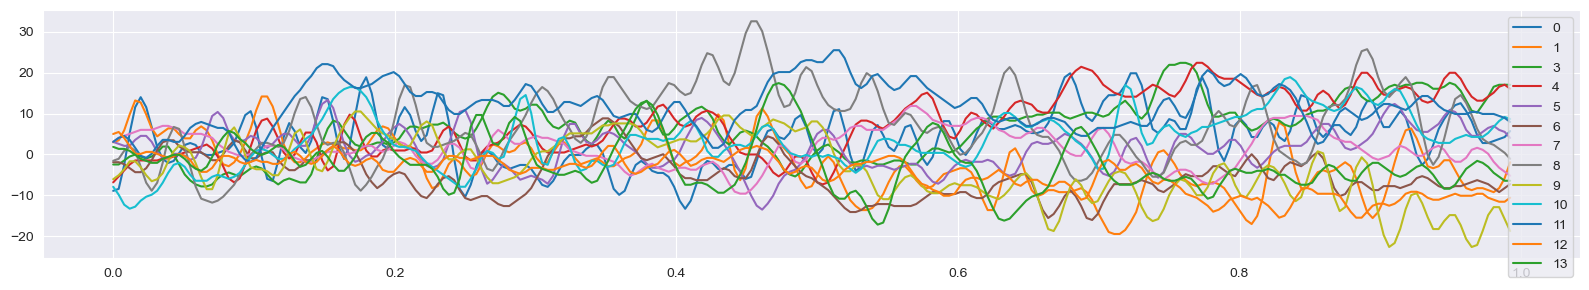

In [47]:
plt.rcParams["figure.figsize"] = (16,3)
c = int(len(EEG_data_FP1_trial_0['sensor value']) / 256)
for i in range(c):
    if i != 2:
        plt.plot(EEG_data_FP1_trial_0['time'][:255], EEG_data_FP1_trial_0['sensor value'][i*256:(i+1)*256 -1], label=str(i))
        plt.legend()
        plt.tight_layout()

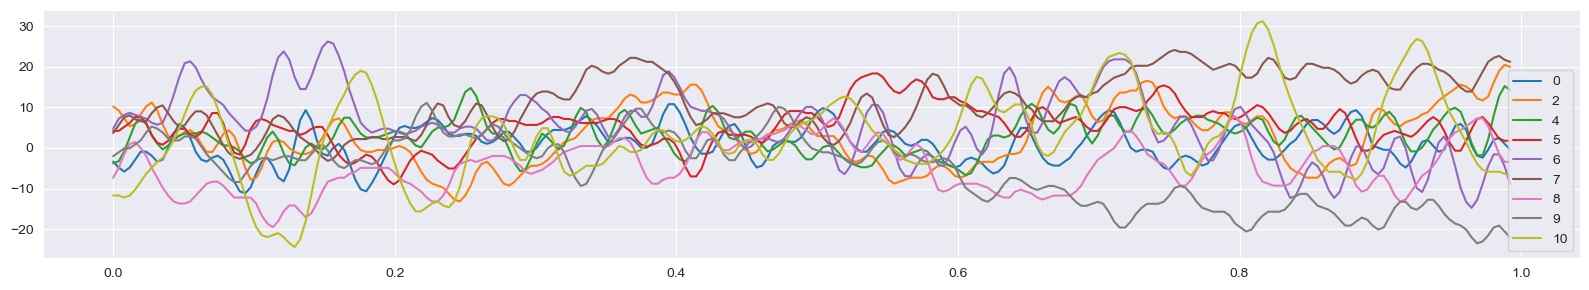

In [52]:
plt.rcParams["figure.figsize"] = (16,3)
c = int(len(EEG_data_FP1_trial_2['sensor value']) / 256)
means = []
for i in range(c):
    if i != 1 and i != 3:
        means.append(EEG_data_FP1_trial_2['sensor value'][i*256:(i+1)*256 -1].mean())
        plt.plot(EEG_data_FP1_trial_2['time'][:255], EEG_data_FP1_trial_2['sensor value'][i*256:(i+1)*256 -1], label=str(i))
        plt.legend()
        plt.tight_layout()
        # plt.show()

In [54]:
means



[0.8895372549019607,
 3.162717647058824,
 3.071490196078431,
 5.356486274509804,
 5.6549411764705875,
 11.539725490196078,
 -4.554662745098039,
 -5.684776470588235,
 2.8793137254901957]

In [189]:
import dtaidistance 
i = 0
j = 1
distance = dtaidistance.dtw.distance(EEG_data_FP1_trial_2['sensor value'][i*256:(i+1)*256 -1], EEG_data_FP1_trial_2['sensor value'][j*256:(j+1)*256 -1])
print(distance)

ModuleNotFoundError: No module named 'dtaidistance'

In [190]:
len(EEG_data_FP1_trial_2['sensor value'][:255]), len(EEG_data_FP1_trial_2['time'])

(255, 2816)

<Axes: >

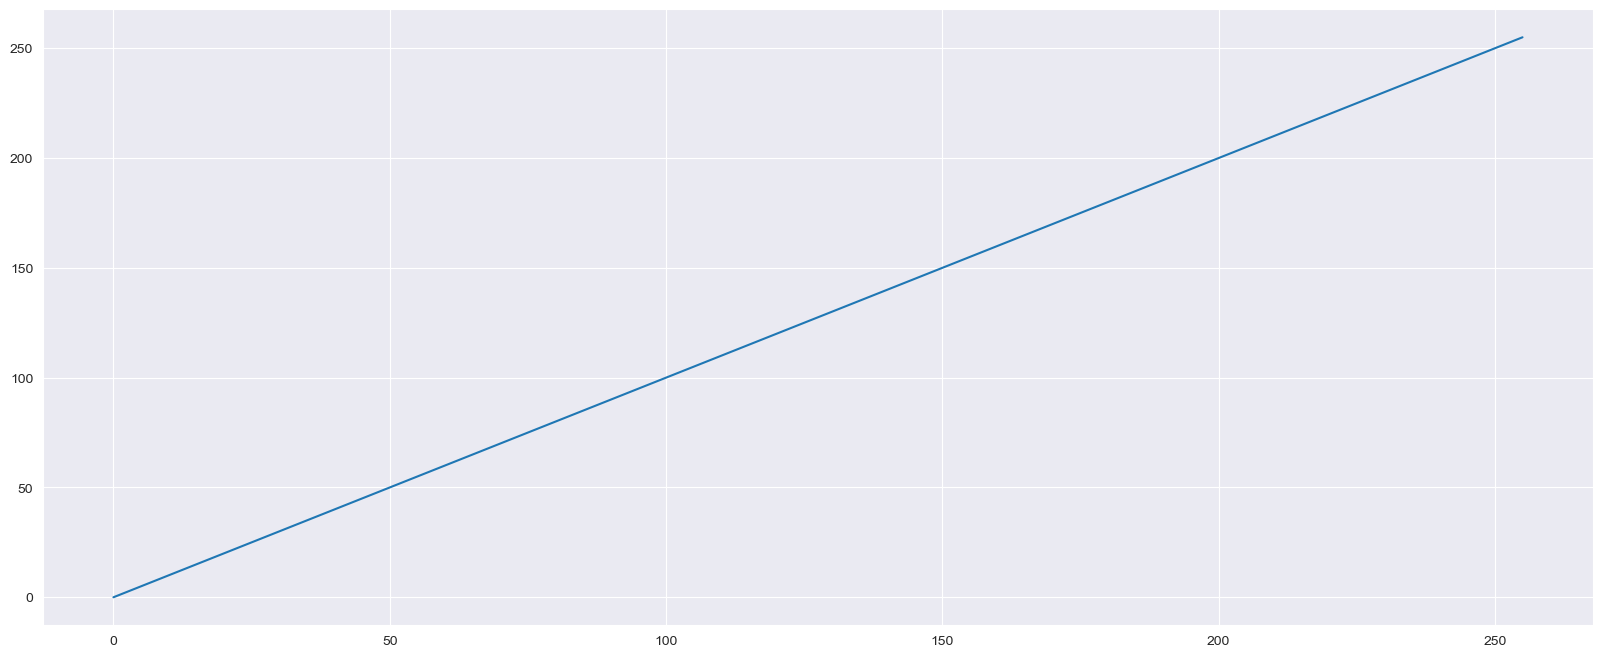

In [191]:
EEG_data_FP1_trial_2['sample num'].plot()

In [192]:
EEG_data_FP1_trial_2['sample num'][:4]

0    0
1    1
2    2
3    3
Name: sample num, dtype: int64

In [193]:
EEG_data_FP1_trial_2['sample num'][256:260]

0    0
1    1
2    2
3    3
Name: sample num, dtype: int64

In [194]:
np.unique(EEG_data['trial number']) # 107 trials

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  41,
        43,  45,  47,  49,  51,  53,  55,  57,  59,  61,  63,  65,  67,
        71,  73,  75,  77,  79,  83,  87,  89,  97, 107])

In [195]:
np.unique(EEG_data['sensor position']) # 64 positions

array(['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3',
       'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8',
       'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7',
       'TP8', 'X', 'Y', 'nd'], dtype=object)

In [196]:
107 * 14 * 256

383488

In [197]:
len(EEG_data['sensor position']=='AF1'), len(EEG_data['sensor position']=='AF2'), len(EEG_data['sensor position']=='AF7'), len(EEG_data['sensor position']=='nd')

(7667712, 7667712, 7667712, 7667712)

In [198]:
EEG_data_AF1 = EEG_data[EEG_data['sensor position']=='AF1']
EEG_data_AF1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119808 entries, 1024 to 1279
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trial number        119808 non-null  int64  
 1   sensor position     119808 non-null  object 
 2   sample num          119808 non-null  int64  
 3   sensor value        119808 non-null  float64
 4   subject identifier  119808 non-null  object 
 5   matching condition  119808 non-null  object 
 6   channel             119808 non-null  int64  
 7   name                119808 non-null  object 
 8   time                119808 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.1+ MB


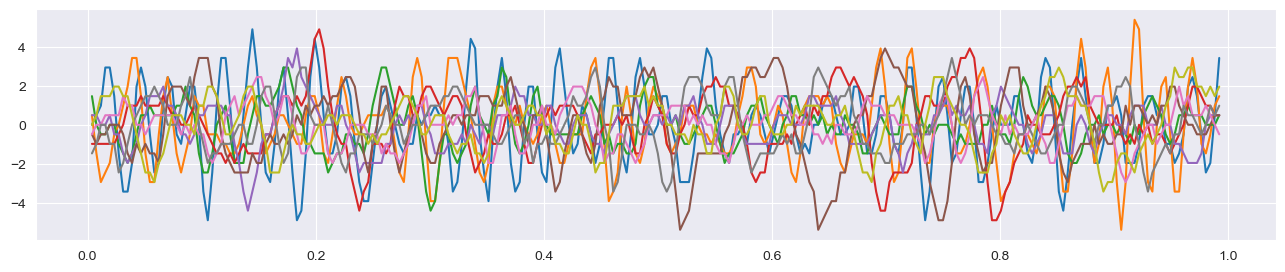

In [199]:
plt.rcParams["figure.figsize"] = (16,3)
for i in range(9): #len(EEG_data_AF1['sensor position'])):
    plt.plot(EEG_data_AF1['time'][:255], EEG_data_AF1['sensor value'][i*256:(i+1)*256 -1].diff(), label=str(i))

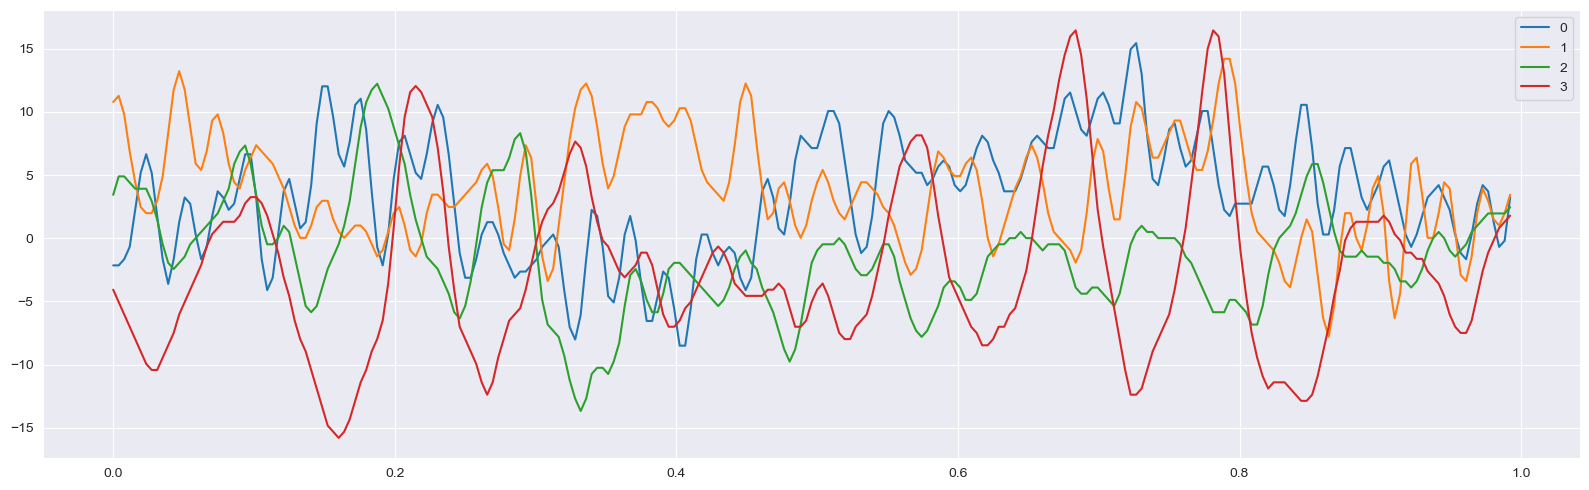

In [202]:
plt.rcParams["figure.figsize"] = (16,5)
for i in range(4): #len(EEG_data_AF1['sensor position'])):
    plt.plot(EEG_data_AF1['time'][:255], EEG_data_AF1['sensor value'][i*256:(i+1)*256 -1], label=str(i))
    plt.legend()
    plt.tight_layout()
    # plt.show()

In [201]:
len(EEG_data_AF1['sensor value'])

119808

In [203]:
EEG_data.shape

(7667712, 9)

In [205]:
EEG_data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [207]:
np.unique(EEG_data['channel'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [208]:
eeg_channel_0 = EEG_data[EEG_data['channel'] == 0]

In [217]:
eeg_channel_0.shape

(119808, 9)

In [214]:
256 * 14 * 62

222208

In [216]:
len(np.unique(EEG_data['trial number']))

62

In [ ]:
1, 49, 42, 44, 46, 

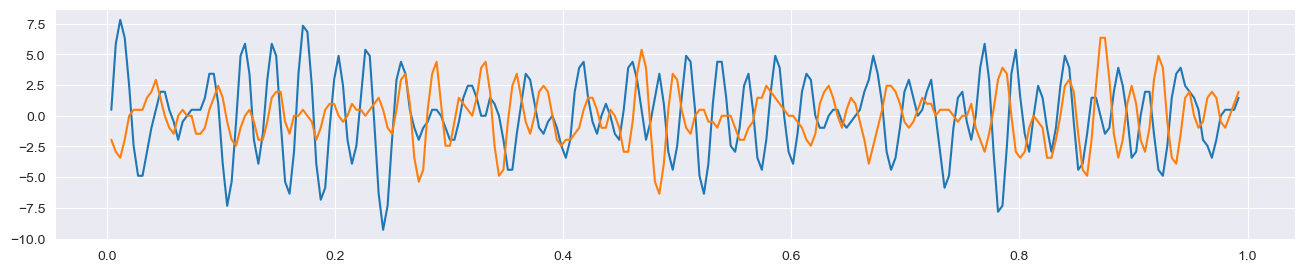

In [222]:
plt.rcParams["figure.figsize"] = (16,3)

for i in range(2): #len(EEG_data_AF1['sensor position'])):
    plt.plot(eeg_channel_0['time'][:255], eeg_channel_0['sensor value'][i*256:(i+1)*256 -1].diff(), label=str(i))

In [145]:
# https://mlcourse.ai/book/topic09/assignment09_time_series_solution.html
# https://towardsdatascience.com/time-series-data-analysis-with-sarima-and-dash-f4199c3fc092
# https://github.com/YohanCaillau/Time-Series/blob/master/stationarity_Dickey_Fuller_test.ipynb
# https://github.com/Beliavsky/R-Time-Series-Task-View-Supplement
# https://github.com/millengustavo/time-series-forecasting/blob/master/statistical-forecasting/statistical-forecasting.md
# https://github.com/thuml/Time-Series-Library
# https://www.tandfonline.com/doi/abs/10.1080/07350015.2022.2036612

In [146]:
#  https://deeplearningofpython.blogspot.com/2023/05/Clustering-withdeeplearningmodels-python.html?source=post_page-----267f9976dd00--------------------------------
# https://home.agh.edu.pl/~horzyk/lectures/ci/CI%20Unsupervised%20Learning,%20Autoencoders%20and%20Clustering%20Algorithms.pdf
 # https://github.com/saman-nia/Deep-Neural-Networks-for-Clustering/blob/master/Scientific%20Report.pdf